In [2]:
from typing import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bissecao(f: Callable[[float], float], a: float, b: float, tol: float) -> float:
    """
    Método da Bisseção para encontrar raiz de f em [a, b].

    Parâmetros:
    f   : função contínua
    a   : limite inferior
    b   : limite superior
    tol : tolerância para |b-a|/2

    Retorna:
    Raiz aproximada de f(x)=0 em [a, b].
    """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) e f(b) devem ter sinais opostos.")
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

In [4]:
def newton(
    f: Callable[[float], float],
    df: Callable[[float], float],
    x0: float,
    tol: float,
    max_iter: int = 50
) -> float:
    """
    Método de Newton para encontrar raiz de f.

    Parâmetros:
    f        : função diferenciável
    df       : derivada de f
    x0       : aproximação inicial
    tol      : tolerância para |x_{n+1} - x_n|
    max_iter : número máximo de iterações

    Retorna:
    Raiz aproximada de f(x)=0.
    """
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("derivada nula em x = {}".format(x))
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

In [5]:
def jacobi(
    A: np.ndarray,
    b: np.ndarray,
    x0: Optional[np.ndarray] = None,
    tol: float = 1e-8,
    max_iter: int = 1000
) -> np.ndarray:
    """
    Método de Jacobi para solução de Ax=b.

    Parâmetros:
    A        : matriz de coeficientes (n×n)
    b        : vetor de termos independentes (n,)
    x0       : chute inicial (n,). Se None, assume zeros.
    tol      : tolerância para critério de parada
    max_iter : número máximo de iterações

    Retorna:
    Vetor solução x (n,).
    """
    n = A.shape[0]
    x = np.zeros(n) if x0 is None else x0.copy()
    x_new = np.zeros_like(x)
    for _ in range(max_iter):
        for i in range(n):
            s = A[i, :i] @ x[:i] + A[i, i+1:] @ x[i+1:]
            x_new[i] = (b[i] - s) / A[i, i]
        if np.max(np.abs(x_new - x)) < tol:
            return x_new
        x[:] = x_new
    return x

In [6]:
def gauss_seidel(
    A: np.ndarray,
    b: np.ndarray,
    x0: Optional[np.ndarray] = None,
    tol: float = 1e-8,
    max_iter: int = 1000
) -> np.ndarray:
    """
    Método de Gauss-Seidel para solução de Ax=b.

    Parâmetros:
    A        : matriz de coeficientes (n×n)
    b        : vetor de termos independentes (n,)
    x0       : chute inicial (n,). Se None, assume zeros.
    tol      : tolerância para critério de parada
    max_iter : número máximo de iterações

    Retorna:
    Vetor solução x (n,).
    """
    n = A.shape[0]
    x = np.zeros(n) if x0 is None else x0.copy()
    for _ in range(max_iter):
        x_prev = x.copy()
        for i in range(n):
            s = A[i, :i] @ x[:i] + A[i, i+1:] @ x_prev[i+1:]
            x[i] = (b[i] - s) / A[i, i]
        if np.max(np.abs(x - x_prev)) < tol:
            return x
    return x

In [7]:
def ajuste_polinomial(x: Sequence[float], y: Sequence[float], grau: int) -> np.ndarray:
    """
    Ajuste polinomial (mínimos quadrados) de grau dado.

    Parâmetros:
    x     : coordenadas x dos dados
    y     : coordenadas y dos dados
    grau  : grau do polinômio a ajustar

    Retorna:
    Coeficientes [a0, a1, ..., a_grau] do polinômio ajustado.
    """
    n = len(x)
    M = np.zeros((n, grau + 1))
    for i in range(n):
        for j in range(grau + 1):
            M[i, j] = x[i] ** j

    # (M^T M) 
    # a = M^T y
    G = M.T @ M
    d = M.T @ np.array(y)
    a = np.linalg.solve(G, d)
    return a  # a[i] corresponde a coeficiente de x^i

In [8]:
def interpolacao(xi: Sequence[float], yi: Sequence[float], x: float) -> float:
    """
    Interpolação de Lagrange em um ponto.

    Parâmetros:
    xi : lista de abscissas
    yi : lista de ordenadas
    x  : ponto onde interpolar

    Retorna:
    Valor interpolado P(x).
    """
    n = len(xi)
    total = 0.0
    for i in range(n):
        Li = 1.0
        for j in range(n):
            if i != j:
                Li *= (x - xi[j]) / (xi[i] - xi[j])
        total += yi[i] * Li
    return total

In [9]:
def interpolacao_linear(xi: Sequence[float], yi: Sequence[float], x: float) -> float:
    """
    Interpolação linear em um ponto dado pelo segmento que contém x.

    Parâmetros:
    xi : sequência ordenada de abscissas
    yi : sequência de ordenadas correspondentes
    x  : ponto onde interpolar

    Retorna:
    Valor interpolado.
    """
    # encontra i tal que xi[i] <= x <= xi[i+1]
    for i in range(len(xi) - 1):
        if xi[i] <= x <= xi[i+1]:
            t = (x - xi[i]) / (xi[i+1] - xi[i])
            return yi[i] * (1 - t) + yi[i+1] * t
    raise ValueError("x fora do intervalo de interpolação.")

In [10]:
def interpolacao_newton(xi: Sequence[float], yi: Sequence[float], x: float) -> float:
    """
    Interpolação de Newton via diferenças divididas.

    Parâmetros:
    xi : abscissas (sequência de tamanho n)
    yi : ordenadas (mesmo tamanho)
    x  : ponto onde avaliar o polinômio de Newton

    Retorna:
    Valor interpolado P(x).
    """
    n = len(xi)
    coef = list(yi)
    for k in range(1, n):
        for i in range(n-1, k-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (xi[i] - xi[i-k])
    result = coef[-1]
    for k in range(n-2, -1, -1):
        result = result * (x - xi[k]) + coef[k]
    return result

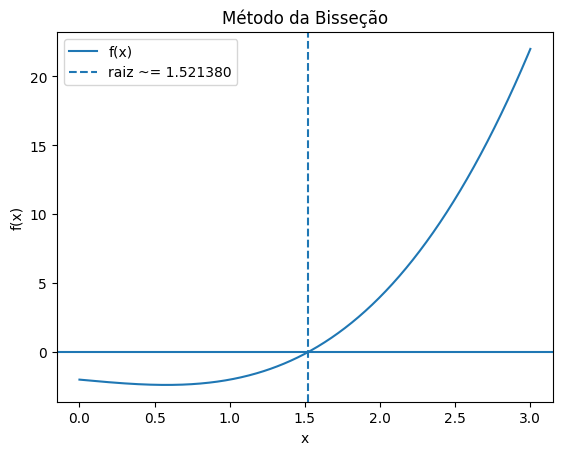

In [11]:
def f(x):
    return x**3 - x - 2

raiz = bissecao(f, 1.0, 2.0, tol=1e-6)

x = np.linspace(0, 3, 400)
y = f(x)
plt.figure()
plt.axhline(0)
plt.plot(x, y, label='f(x)')
plt.axvline(raiz, linestyle='--', label=f'raiz ~= {raiz:.6f}')
plt.legend()
plt.title("Método da Bisseção")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

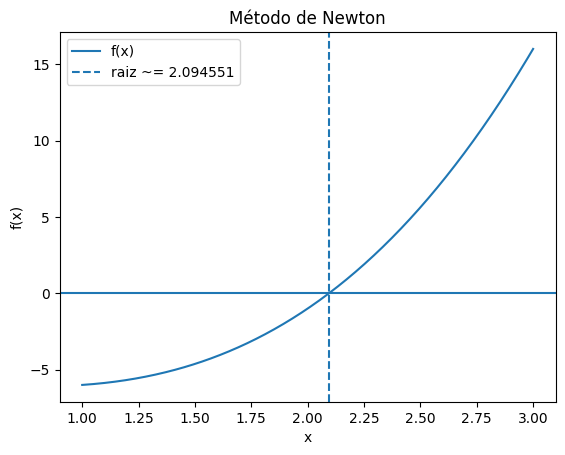

In [12]:
def f(x):
    return x**3 - 2*x - 5
def df(x):
    return 3*x**2 - 2

raiz = newton(f, df, x0=2.0, tol=1e-6)

x = np.linspace(1, 3, 400)
y = f(x)
plt.figure()
plt.axhline(0)
plt.plot(x, y, label='f(x)')
plt.axvline(raiz, linestyle='--', label=f'raiz ~= {raiz:.6f}')
plt.legend()
plt.title("Método de Newton")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


Solução via Jacobi: [5. 5. 5.]


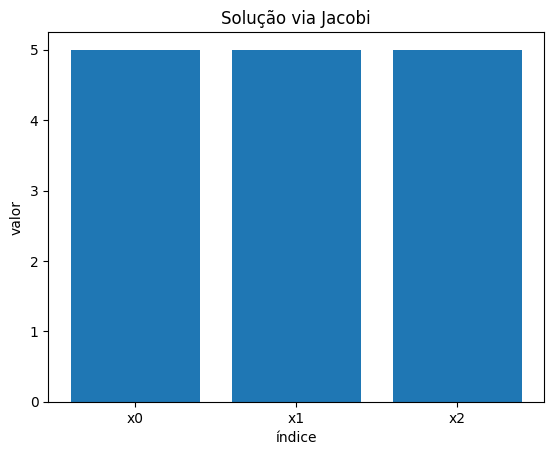

In [13]:
A = np.array([[4, -1, 0],
              [-1, 4, -1],
              [0, -1, 3]], float)
b = np.array([15, 10, 10], float)

x = jacobi(A, b, tol=1e-8, max_iter=100)
print("Solução via Jacobi:", x)

plt.figure()
plt.bar(range(len(x)), x)
plt.xticks(range(len(x)), [f"x{i}" for i in range(len(x))])
plt.title("Solução via Jacobi")
plt.xlabel("índice")
plt.ylabel("valor")
plt.show()

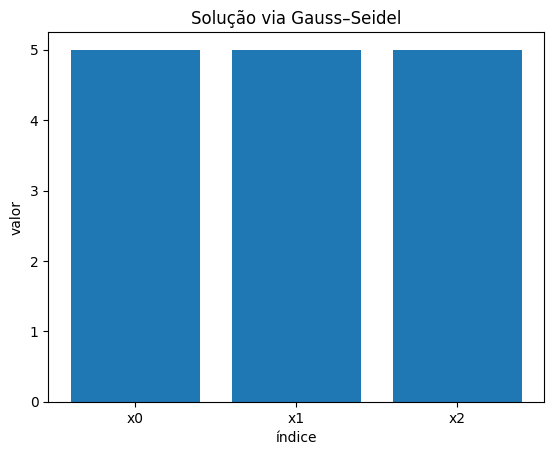

In [14]:
A = np.array([[4, -1, 0],
              [-1, 4, -1],
              [0, -1, 3]], float)
b = np.array([15, 10, 10], float)

x = gauss_seidel(A, b, tol=1e-8, max_iter=100)

plt.figure()
plt.bar(range(len(x)), x)
plt.xticks(range(len(x)), [f"x{i}" for i in range(len(x))])
plt.title("Solução via Gauss–Seidel")
plt.xlabel("índice")
plt.ylabel("valor")
plt.show()

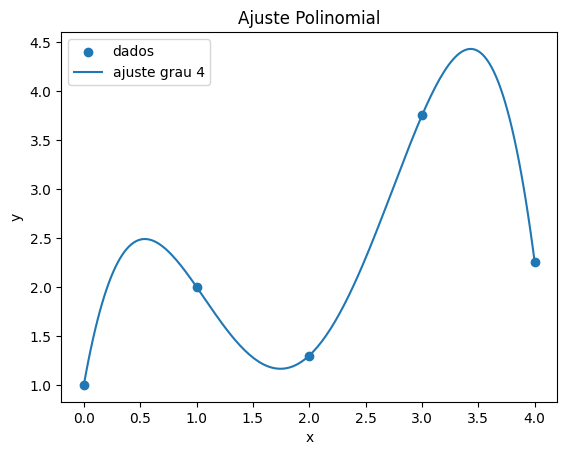

In [19]:
x = np.array([0, 1, 2, 3, 4], float)
y = np.array([1, 2, 1.3, 3.75, 2.25], float)

grau = 4
coef = ajuste_polinomial(x, y, grau=grau) 

xp = np.linspace(min(x), max(x), 200)
yp = sum(coef[i]*xp**i for i in range(len(coef)))

# plota dados e curva ajustada
plt.figure()
plt.scatter(x, y, label='dados')
plt.plot(xp, yp, label='ajuste grau '+str(grau))
plt.legend()
plt.title("Ajuste Polinomial")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

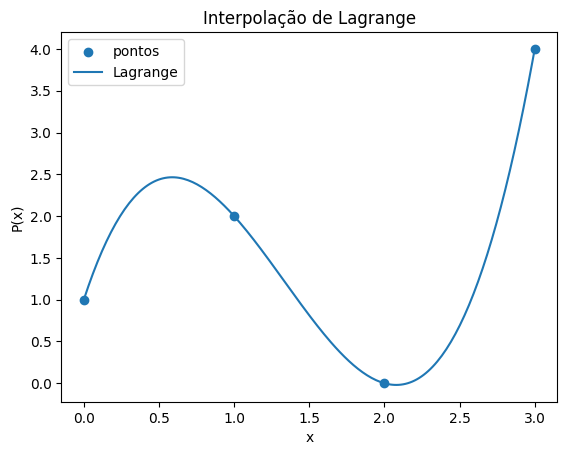

In [16]:
xi = [0, 1, 2, 3]
yi = [1, 2, 0, 4]

x = np.linspace(min(xi), max(xi), 200)
y = [interpolacao(xi, yi, xx) for xx in x]

plt.figure()
plt.scatter(xi, yi, label='pontos')
plt.plot(x, y, label='Lagrange')
plt.legend()
plt.title("Interpolação de Lagrange")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.show()